# Load Dataset

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv("data/dataSet.csv")

In [3]:
data.shape

(9000, 2)

In [4]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",2.0
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",2.0
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",2.0
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",2.0
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",2.0


# Preparing & Splitting Data

In [5]:
data.isnull().sum()

Comment    0
Label      0
dtype: int64

In [6]:
data['Label'] = data['Label'].replace({0.0 : 'Negative', 1.0 : 'Positive', 2.0 : 'Neutral'})

In [7]:
data.head()

,Comment,Label
0,"মুভির ট্রেলার দেখে ভালোই লেগেছে, তবে কিছু কিছু...",Neutral
1,"কিছু দৃশ্য খুব ভালো ছিল, কিন্তু চরিত্রগুলোর মধ...",Neutral
2,"অভিনয় মোটামুটি ভালো, তবে প্রডাকশন ভীষণ ভালো হত...",Neutral
3,"গল্পটা ঠিকঠাক, তবে কিছু জায়গায় লম্বা মনে হয়েছে।",Neutral
4,"সুরের সাথে সাথে দৃশ্যগুলোও ভালো লেগেছে, তবে কি...",Neutral


In [8]:
X = data["Comment"]
y = data["Label"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_en = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer()
X_train_vct = vct.fit_transform(X_train)
X_test_vct = vct.transform(X_test)

# Build Model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.775


In [13]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.775


In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.775


In [91]:
model = LogisticRegression(C=14, penalty='l2', solver='newton-cg', max_iter=2500)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.794


# Hyperparameter Tuning

In [16]:
model = LogisticRegression()

In [ ]:
import numpy as np

param_grid = [
    {
        'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 20),
        # 'C': [0.1, 1, 10],
        'solver' : ['liblinear', 'saga'],
        'max_iter' : [100, 1000, 2500, 5000]
    }
]

# Logistic Regression - GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [21]:
# clf = GridSearchCV(model, param_grid=param_grid)

In [22]:
best_clf = clf.fit(X_train_vct,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, solver='saga')

In [24]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.767


In [25]:
model = LogisticRegression(C=1.623776739188721, solver='saga',max_iter=1000)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.782


In [26]:
model = LogisticRegression(C=1, solver='saga',max_iter=5000)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.775


# Logistic Regression - RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
clf = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1,)

In [39]:
best_clf = clf.fit(X_train_vct,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [40]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [41]:
print(f'Accuracy : {best_clf.score(X_train_vct,y_train):.3f}')

Accuracy : 0.763


In [42]:
model = LogisticRegression(C=1.623776739188721, solver='saga',max_iter=1000)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.782


In [43]:
model = LogisticRegression(C=1, solver='saga',max_iter=5000)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.775


# Best Result :

In [92]:
model = LogisticRegression(C=14, penalty='l2', solver='newton-cg', max_iter=2500)
model.fit(X_train_vct,y_train)
print(f'Accuracy : {model.score(X_train_vct,y_train):.3f}')

Accuracy : 0.794


In [93]:
prediction = model.predict(X_test_vct)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       613
           1       0.67      0.70      0.69       614
           2       0.70      0.70      0.70       573

    accuracy                           0.67      1800
   macro avg       0.67      0.67      0.67      1800
weighted avg       0.67      0.67      0.67      1800



In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

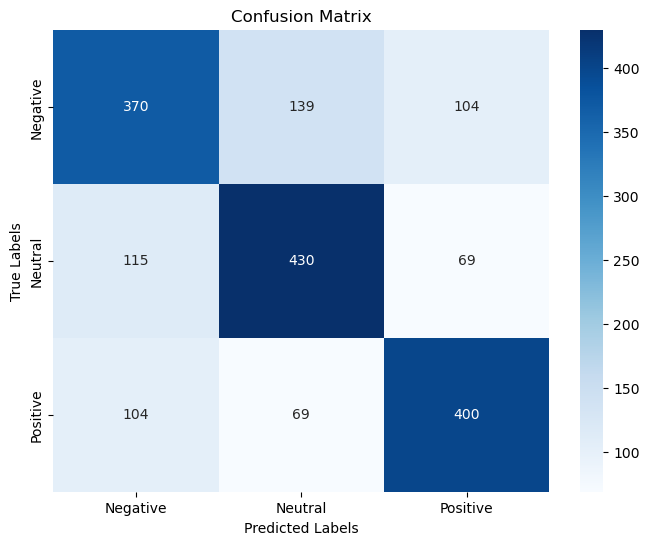

In [96]:
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()